In [96]:
from google.colab import files
files.upload()

Saving assign.xlsx to assign (4).xlsx


{'assign.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\x9f;\xdd\xa0\x8c\x01\x00\x00\x89\x06\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [0]:
df = pd.read_excel('assign.xlsx',sheet_name='tips')

In [99]:
df.tail(5)

,total_bill,tip,sex,smoker,day,time,size
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0
244,NaN,NaN,0.356557,0.618852,NaN,NaN,NaN


In [0]:
df=df.drop(df.index[244])

In [101]:
df.tail(5)

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3.0
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0


In [102]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0


In [103]:
df.shape

(244, 7)

image.png

In [0]:
avg_tips=df.tip.mean()

In [105]:
avg_tips

2.9982786885245902

Get a numerical summary for 'tip' - are the median and mean very different? What does this tell you about the field?

In [106]:
df.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

Mean and median are almost same the distribution is symmetric and their is 0 skewness

Prepare a boxplot for 'tip', are there any outliers?

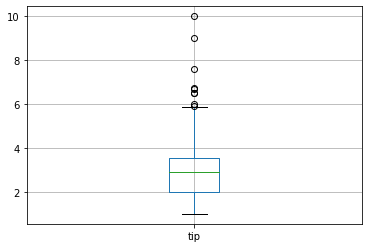

In [107]:
df.boxplot('tip')

Prepare a boxplot for 'total_bill', are there any outliers?

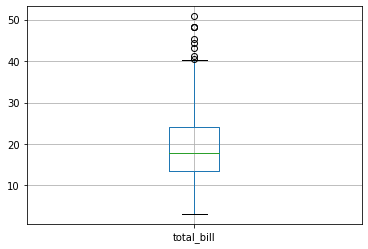

In [108]:
df.boxplot('total_bill')

Gender: what is the percent of females in the data? 

In [109]:
df.sex.describe()

count      244
unique       2
top       Male
freq       157
Name: sex, dtype: object

In [110]:
df.sex.unique()

array(['Female', 'Male'], dtype=object)

In [111]:
(df['sex'].value_counts()/df['sex'].count())*100

Male      64.344262
Female    35.655738
Name: sex, dtype: float64

Prepare a bar plot with the bars representing the percentage of records for each gender.

In [0]:
a=(df['sex'].value_counts()/df['sex'].count())*100

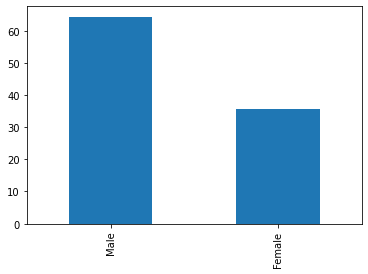

In [113]:
a.plot(kind='bar')

Does the average tip differ by gender? Does one gender tip more than the other?

In [114]:
df.groupby(by='sex')['tip'].mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

Does the average tip differ by the time of day?

In [115]:
df.groupby(by='day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

Does the average tip differ by size (number of people at the table)? 

In [116]:
df.groupby(by='size')['tip'].mean()

size
1.0    1.437500
2.0    2.582308
3.0    3.393158
4.0    4.135405
5.0    4.028000
6.0    5.225000
Name: tip, dtype: float64

Do smokers tip more than non-smokers?

In [117]:
df.groupby(by='smoker')['tip'].count()

smoker
No     151
Yes     93
Name: tip, dtype: int64

Gender vs. smoker/non-smoker and tip size - create a 2 by 2 and get the average tip size. Which group tips the most?

In [118]:
df.groupby(by=['smoker','sex']).mean()['tip']

smoker  sex   
No      Female    2.773519
        Male      3.113402
Yes     Female    2.931515
        Male      3.051167
Name: tip, dtype: float64

In [119]:
df.groupby(by=['smoker','sex']).mean()['tip'].unstack()

sex,Female,Male
smoker,,
No,2.773519,3.113402
Yes,2.931515,3.051167


In [120]:
pd.pivot_table(data=df,index='sex',columns='smoker',values='tip')

smoker,No,Yes
sex,,
Female,2.773519,2.931515
Male,3.113402,3.051167


Create a new metric called 'pct_tip' = tip/ total_bill - this would be percent tip give, and should be a better measure of the tipping behaviour.

In [0]:
pct_tip=(df.tip/df.total_bill)

In [0]:
df['pct_tip']=pct_tip

Does pct_tip differ by gender? Does one gender tip more than the other?

In [123]:
df.groupby(by='sex')['pct_tip'].count()

sex
Female     87
Male      157
Name: pct_tip, dtype: int64

Does pct_tip differ by size (number of people at the table)? 

In [124]:
df.groupby(by='size')['pct_tip'].count()

size
1.0      4
2.0    156
3.0     38
4.0     37
5.0      5
6.0      4
Name: pct_tip, dtype: int64

Make the gender vs. smoker view using pct_tip  - does your inference change?

In [125]:
df.groupby(by=['smoker','sex'])['pct_tip'].mean()

smoker  sex   
No      Female    0.156921
        Male      0.160669
Yes     Female    0.182150
        Male      0.152771
Name: pct_tip, dtype: float64

Make a scatter plot of total_bill vs. tip.

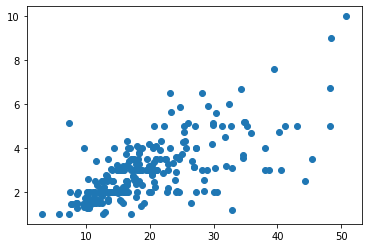

In [126]:
plt.scatter(df.total_bill,df.tip)

Make a scatter plot of total_bill vs. pct_tip.

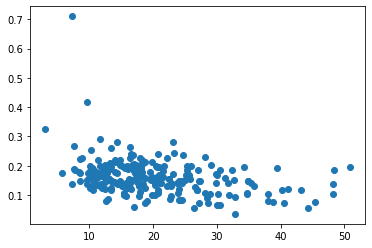

In [127]:
plt.scatter(df.total_bill,df.pct_tip)